<h1>Dependencias

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers

<h1> Conceitos

<h1>Base

In [197]:
actions = pd.read_csv('ActionList.csv')
#Setting time column from string to Float
actions['Time'] = actions['Time'].apply(lambda x: x.replace(',','.')).astype(float)

ref = pd.read_csv('RefPostos.csv')
ref = ref.drop(columns=['Classe Posto','Ordem Atividades','Parte'])
#Setting time column from string to Float
ref['Tempo (s)'] = ref['Tempo (s)'].apply(lambda x: x.replace(',','.')).astype(float)

operators = pd.read_csv('Operadores.csv')

<h2> Referencia (44 Postos)

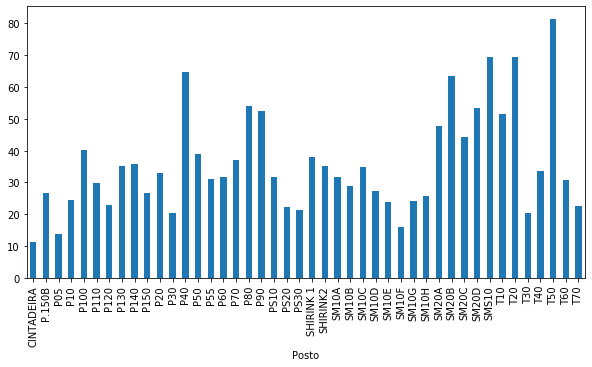

In [8]:
#Graph for referential comparison data
ref.groupby('Posto')['Tempo (s)'].sum().plot(kind="bar", figsize=(10,5))

<h1> Função para escolha da ordem de operadores e Max Time

In [327]:
def getRandomOperatorsOrder():
    import random
    return random.sample(range(len(operators.Nome)),len(operators.Nome))

In [536]:
def getFirstOperatorsOrder():
    
    order = []
    
    for i in range(0,len(operators.Nome)):
        order = np.append(order, i)
        
    return order

In [457]:
def getRandomMaxTime():
    import random
    return random.randint(10, 100)

In [413]:
def getEvaluation(missing_actions,not_working_operators,mean_time):
    if(missing_actions > 0 or not_working_operators > 0):
        return 0
    else:
        return mean_time

<h1> Função de Distribuição de Atividades

In [512]:
def initSimulation():
    #Definindo valores de entrada
    tt = np.max(actions.Time)
    order = getFirstOperatorsOrder()

In [537]:
getFirstOperatorsOrder()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43.])

In [504]:
def getDistribution(print_flag): 

    #Definindo tempo total somado das atividades
    total_time = actions.Time.sum()

    #Definindo a distribuição sequencial baseada em TT e order
    accumulator = 0
    full_time = 0
    time_posto = [0] * len(operators.Nome)
    index = 0
    action_num = 0

    while(action_num < len(actions.Time)-1 and index < len(operators.Nome)):

        while accumulator < tt-actions.Time[action_num]*operators.Eficiencia[order[index]]:
            if(action_num < len(actions.Time)-1):
                accumulator = accumulator + actions.Time[action_num]*operators.Eficiencia[order[index]]
                action_num = action_num + 1
            else:
                break

        time_posto[index] = accumulator 
        full_time = full_time + accumulator
        accumulator = 0
        index = index + 1
        
    missing_actions = len(actions.Time)-1 - action_num 
    not_working_operators = len(operators.Nome) - np.count_nonzero(time_posto)
    mean_time = time_posto[time_posto!=0].mean()
    max_time = np.max(time_posto)

    #Printa valores de saída se flag acionada
    if(print_flag == 1):
        print('INPUT')
        print(f'Tempo Maximo/Posto: {tt}')
        print(f'Ordem dos Operadores: {order}')
        print('')
        print('OUTPUT')
        print(f'Ações faltando: {missing_actions}')
        print(f'Operadores sem Trabalho: {not_working_operators}')
        print(f'Tempo Maximo no posto: {max_time}')

        print('')

        print(f'SCORE: {getEvaluation(missing_actions,not_working_operators,max_time)}')

        pd.DataFrame(time_posto).plot(kind="bar",figsize=(10,5),legend=0)
    
    return getEvaluation(missing_actions,not_working_operators,max_time)

<h1> Método de Iteração Simples

In [476]:
score = 100000

for i in range (0,1000):
    returned = getDistribution(0)
    #print(f'Score: {returned}')
    if(returned > 0 and returned < score):
        score = returned
        
print(f'Score Máximo:{score}')

Score Máximo:28.824899999999992


<h1>Modelo

INPUT
Tempo Maximo/Posto: 30.05
Ordem dos Operadores: [29, 24, 37, 30, 25, 6, 36, 16, 11, 15, 28, 13, 18, 34, 40, 2, 17, 26, 41, 14, 10, 19, 23, 0, 35, 3, 31, 42, 8, 32, 7, 20, 43, 33, 38, 21, 39, 12, 9, 4, 1, 5, 22, 27]

OUTPUT
Ações faltando: 0
Operadores sem Trabalho: 0
Tempo Maximo no posto: 29.964000000000002

SCORE: 29.964000000000002


29.964000000000002

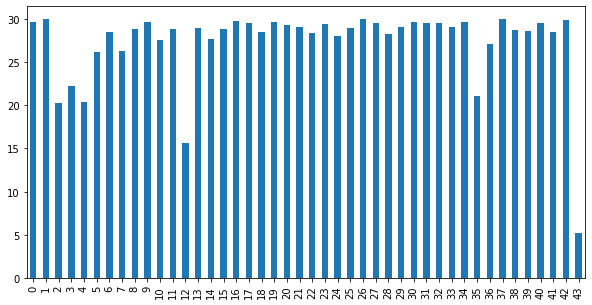

In [508]:
getDistribution(1)

<h1>Testes

<h1>Resultados